In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('CBS_2021-2023_Full.csv', low_memory=False)

### Context

Capital bike share project. First step: investigating aggregated DAILY weather and HOURLY weather data. 

In [23]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


### Features - for FULL data

- **ride_id**	    = OBJECT [string of numbers and letters] 
- **rideable_type**	= OBJECT [classic bike, electric bike]
- **started_at**	= OBJECT->Changed to DATE [DATE + TIME]	
- **ended_at**	= OBJECT->Changed to DATE [DATE + TIME]	
- **start_station_name**	= OBJECT [Address]	
- **start_station_id**	= OBJECT [5-digit-number with one decimal]	
- **end_station_name**	= OBJECT [Address]	
- **end_station_id**	= OBJECT [5-digit-number with one decimal]	
- **start_lat**	= Float [38.76 to 39.14]	
- **start_lng**	= Float [-77.40 to -76.82]	
- **end_lat**	= Float [0.00 to 39.19]	
- **end_lng**	= Float [-77.56 to 0.00]	
- **member_casual**	= OBJECT [casual or member]

- **date**	= datetime64[ns]
- **year**	= int32
- **season**	= object
- **month**	= object
- **day_of_week**	= object
- **weekday**	= object
- **public_holiday**	= object
- **start_end_station**	= object
- **duration_min**	= timedelta64[ns]
- **start_end_station_id**	= object

In [24]:
# Check info and dtypes of the dataframe
print("Info of the DataFrame:\n", '\n')
df.info()

# observation: "Casual" & "Total_rides") are int64, but it should be float64?
# date: Object -> change to datetime

Info of the DataFrame:
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [25]:
# Check unique values before conversion
unique_values_before = df.nunique()
print("Unique values before conversion:\n", unique_values_before, '\n')

# 11 rows with missing data? Variance between 26.280 and 26.269 non-nulls

Unique values before conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1321
end_station_name           865
end_station_id            1338
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [26]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
start_lat,10693995.0,38.903306,0.026842,38.76,38.890539,38.902760,38.914751,39.14
start_lng,10693995.0,-77.031872,0.033462,-77.40,-77.044609,-77.031617,-77.013667,-76.82
end_lat,10677232.0,38.902256,0.050493,0.00,38.890496,38.902314,38.912648,39.19
end_lng,10677232.0,-77.031463,0.091278,-77.56,-77.044661,-77.031500,-77.012808,0.00


In [27]:
# Check Memory usage before converting
memory_usage = df.memory_usage(deep=True)
print("Memory Usage before Converting dtypes:\n", memory_usage, '\n')

Memory Usage before Converting dtypes:
 Index                       128
ride_id               780661781
rideable_type         739790470
started_at            812743772
ended_at              812743772
start_station_name    820106397
start_station_id      660578762
end_station_name      815981136
end_station_id        658388628
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual         673721811
dtype: int64 



In [28]:
# Copy the dataframe
df_full = df.copy()

# Convert categorical columns to category type for memory efficiency
df_full["rideable_type"] = df_full["rideable_type"].astype("category")
df_full["start_station_name"] = df_full["start_station_name"].astype("category")
df_full["end_station_name"] = df_full["end_station_name"].astype("category")
df_full["member_casual"] = df_full["member_casual"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
df_full['started_at'] = pd.to_datetime(df_full['started_at'])
df_full['ended_at'] = pd.to_datetime(df_full['ended_at'])

# Regenerate the entire ride_id column with sequential integers and convert it
# to a memory-efficient data type (uint32)
df_full['ride_id'] = pd.Series(range(1, len(df_full) + 1), dtype='uint32')

In [29]:
# Check info and dtypes after conversion
info_after = df_full.info()
print("Info of the DataFrame after conversion:\n", info_after, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             uint32        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(4), datetime64[ns](2), float64(4), object(2), uint32(1)
memory usage: 754.8+ MB
Info of the DataFrame after conversion:
 None 



In [30]:
# Check unique values after conversion
unique_values_after = df_full.nunique()
print("Unique values after conversion:\n", unique_values_after, '\n')

Unique values after conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1321
end_station_name           865
end_station_id            1338
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [31]:
# Check memory usage after all conversions
print("Memory Usage after Converting dtype:\n", df_full.memory_usage(deep=True), '\n')

Memory Usage after Converting dtype:
 Index                       128
ride_id                42775988
rideable_type          10694312
started_at             85551976
ended_at               85551976
start_station_name     21492089
start_station_id      660578762
end_station_name       21492487
end_station_id        658388628
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual          10694231
dtype: int64 



In [32]:
# Calculate how much we reduced the in-memory footprint of the dataset
reduction = df_full.memory_usage(deep=True).sum() / df.memory_usage(deep=True).sum()
print(f"We reduced the in-memory footprint of the dataset to {reduction:.2f} of its original size.")


We reduced the in-memory footprint of the dataset to 0.27 of its original size.


Creation of new columns

In [33]:
# new columns date to be created using started_at
df_full['date'] = df_full['started_at'].dt.date
df_full['date'] = pd.to_datetime(df_full['date'])
df_full.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,2021-01-01
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual,2021-01-01
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,2021-01-01
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,2021-01-01
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,2021-01-01


In [34]:
import pandas as pd
import datetime as dt

# Create a new column with the year
df_full['year'] = df_full['date'].dt.year

# Create a new column with the season
df_full['season'] = df_full['date'].dt.quarter
# Transform the season into a string
df_full['season'] = df_full['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Create a new column with the month
df_full['month'] = df_full['date'].dt.month
# Transform the month into a string
df_full['month'] = df_full['month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Create a new column with the year
df_full['year'] = df_full['date'].dt.year

# Create a new column with the week number
df_full['week_number'] = df_full['date'].dt.isocalendar().week

# Create a new column with the day of the week
df_full['day_of_week'] = df_full['date'].dt.day_name()

# Create a new column with weekday yes no
df_full['weekday'] = np.where(df_full['day_of_week'].isin(['Saturday', 'Sunday']), 'no', 'yes')

# Create a new column with public holiday yes no USA
df_full['public_holiday'] = np.where(df_full['date'].isin(['2021-01-01', '2021-01-18', '2021-02-15', '2021-05-31', '2021-07-04', '2021-09-06', '2021-10-11', '2021-11-11', '2021-11-25', '2021-12-25',
                                                                         '2022-01-01', '2022-01-17', '2022-02-21', '2022-05-30', '2022-07-04', '2022-09-05', '2022-10-10', '2022-11-11', '2022-11-24', '2022-12-25',
                                                                         '2023-01-01', '2023-01-16', '2023-02-20', '2023-05-29', '2023-07-04', '2023-09-04', '2023-10-09', '2023-11-11', '2023-11-23', '2023-12-25']), 'yes', 'no')

df_full.head()

C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_11940\1293139667.py:30: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_full['public_holiday'] = np.where(df_full['date'].isin(['2021-01-01', '2021-01-18', '2021-02-15', '2021-05-31', '2021-07-04', '2021-09-06', '2021-10-11', '2021-11-11', '2021-11-25', '2021-12-25',


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,date,year,season,month,week_number,day_of_week,weekday,public_holiday
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,-77.072305,member,2021-01-01,2021,Winter,January,53,Friday,yes,yes
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,...,-77.020000,casual,2021-01-01,2021,Winter,January,53,Friday,yes,yes
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,-77.031691,member,2021-01-01,2021,Winter,January,53,Friday,yes,yes
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,-77.114563,member,2021-01-01,2021,Winter,January,53,Friday,yes,yes
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,-77.032956,member,2021-01-01,2021,Winter,January,53,Friday,yes,yes


In [35]:
# Create new column which combines start station and end station
df_full['start_end_station'] = df_full['start_station_name'].astype(str) + ' - ' + df_full['end_station_name'].astype(str)

# Create new column with start station id and end station id
df_full['start_end_station_id'] = df_full['start_station_id'].astype(str) + ' - ' + df_full['end_station_id'].astype(str)

# Create new column with the duration of the ride in minutes
df_full['duration_min'] = (df_full['ended_at'] - df_full['started_at']).dt.total_seconds() / 60

# df['period'] = df[['Year', 'quarter', ...]].agg('-'.join, axis=1)

# Create a plot with start_end_station_id and number of rides
# limit graph to 20 stations with highest number of rides to make it more readable
# plt.figure(figsize=(20, 10))
# sns.countplot(data=df_full, x='start_end_station_id', order=df_full['start_end_station_id'].value_counts().index(max=20))
# plt.xticks(rotation=90)

In [36]:
df_full.sort_values(by='duration_min', ascending=False).head(20)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,year,season,month,week_number,day_of_week,weekday,public_holiday,start_end_station,start_end_station_id,duration_min
578848,578849,docked_bike,2021-05-02 12:25:01,2021-06-09 09:25:29,17th & K St NW,31213.0,Ballston Metro / Stuart St & 9th St N,31037.0,38.902760,-77.038630,...,2021,Spring,May,17,Sunday,no,no,17th & K St NW - Ballston Metro / Stuart St & ...,31213.0 - 31037.0,54540.466667
9072162,9072163,docked_bike,2023-08-29 11:06:04,2023-10-05 02:00:19,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,31240.0,NaN,NaN,38.884120,-77.046570,...,2023,Summer,August,35,Tuesday,yes,no,Ohio Dr & West Basin Dr SW / MLK & FDR Memoria...,31240.0 - nan,52734.250000
3984327,3984328,docked_bike,2022-06-06 19:07:50,2022-07-13 08:44:41,USDA / 12th & C St SW,31217.0,6035 Warehouse,32901.0,38.886277,-77.028242,...,2022,Spring,June,23,Monday,yes,no,USDA / 12th & C St SW - 6035 Warehouse,31217.0 - 32901.0,52656.850000
8719173,8719174,docked_bike,2023-08-05 16:16:29,2023-09-08 16:44:28,Anacostia Roller Skating Pavilion,31720.0,22nd & P ST NW,31285.0,38.878771,-76.970930,...,2023,Summer,August,31,Saturday,no,no,Anacostia Roller Skating Pavilion - 22nd & P S...,31720.0 - 31285.0,48987.983333
866928,866929,docked_bike,2021-06-06 11:31:30,2021-07-10 10:51:17,Anacostia Roller Skating Pavillion,31720.0,Anacostia Roller Skating Pavillion,31720.0,38.878771,-76.970930,...,2021,Spring,June,22,Sunday,no,no,Anacostia Roller Skating Pavillion - Anacostia...,31720.0 - 31720.0,48919.783333
8869656,8869657,docked_bike,2023-08-16 10:18:38,2023-09-19 04:37:48,North Shore Dr & Village Rd,32223.0,NaN,NaN,38.970412,-77.340787,...,2023,Summer,August,33,Wednesday,yes,no,North Shore Dr & Village Rd - nan,32223.0 - nan,48619.166667
8278918,8278919,docked_bike,2023-07-07 18:08:28,2023-08-10 04:58:06,Maine Ave & Water St SW,31674.0,NaN,NaN,38.876747,-77.020945,...,2023,Summer,July,27,Friday,yes,no,Maine Ave & Water St SW - nan,31674.0 - nan,48169.633333
871700,871701,docked_bike,2021-06-06 18:49:47,2021-07-09 08:19:52,23rd & E St NW,31260.0,New Hampshire Ave & 24th St NW,31275.0,38.896104,-77.049882,...,2021,Spring,June,22,Sunday,no,no,23rd & E St NW - New Hampshire Ave & 24th St NW,31260.0 - 31275.0,46890.083333
824374,824375,docked_bike,2021-06-01 17:11:28,2021-07-02 17:58:16,8th & O St NW,31281.0,Georgia Ave & Emerson St NW,31405.0,38.908640,-77.022770,...,2021,Spring,June,22,Tuesday,yes,no,8th & O St NW - Georgia Ave & Emerson St NW,31281.0 - 31405.0,44686.800000
610600,610601,docked_bike,2021-05-06 20:02:49,2021-06-05 17:36:54,15th St & Constitution Ave NW,31321.0,3rd & M St NE,31627.0,38.892244,-77.033234,...,2021,Spring,May,18,Thursday,yes,no,15th St & Constitution Ave NW - 3rd & M St NE,31321.0 - 31627.0,43054.083333


Creation of "trip_distance" attribute using haversine

In [37]:
import numpy as np

def haversine_np(start_lng, start_lat, end_lng, end_lat):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    
    All args must be of equal length.    
    
    """
    start_lng, start_lat, end_lng, end_lat = map(np.radians, [start_lng, start_lat, end_lng, end_lat])
    
    dlon = end_lng - start_lng
    dlat = end_lat - start_lat
    
    a = np.sin(dlat/2.0)**2 + np.cos(start_lat) * np.cos(end_lat) * np.sin(dlon/2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6378.137 * c
    return km

df_full['trip_distance'] = haversine_np(df_full['start_lng'],df_full['start_lat'],df_full['end_lng'],df_full['end_lat'])

df_full.head(20)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,season,month,week_number,day_of_week,weekday,public_holiday,start_end_station,start_end_station_id,duration_min,trip_distance
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,Winter,January,53,Friday,yes,yes,Maine Ave & 9th St SW - Rosslyn Metro / Wilson...,31646.0 - 31015.0,25.333333,4.372485
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,...,Winter,January,53,Friday,yes,yes,10th & U St NW - nan,31111.0 - nan,15.850000,4.792542
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,Winter,January,53,Friday,yes,yes,17th & Corcoran St NW - 14th & Belmont St NW,31214.0 - 31119.0,14.216667,1.140118
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,Winter,January,53,Friday,yes,yes,Wilson Blvd. & N. Vermont St. - Wilson Blvd. &...,31926.0 - 31926.0,5.583333,0.000000
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,Winter,January,53,Friday,yes,yes,11th & Park Rd NW - 14th & Newton St NW,31651.0 - 31649.0,3.233333,0.414513
5,6,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,NaN,Georgia Ave & Kennedy St NW,31415.0,38.930000,-77.030000,...,Winter,January,53,Friday,yes,yes,nan - Georgia Ave & Kennedy St NW,nan - 31415.0,10.816667,2.981746
6,7,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,...,Winter,January,53,Friday,yes,yes,Bladensburg Rd & Benning Rd NE - Good Hope Rd ...,31617.0 - 31802.0,17.366667,3.705148
7,8,electric_bike,2021-01-01 00:20:40,2021-01-01 00:35:36,Columbia Rd & Georgia Ave NW,31115.0,NaN,NaN,38.928081,-77.023768,...,Winter,January,53,Friday,yes,yes,Columbia Rd & Georgia Ave NW - nan,31115.0 - nan,14.933333,3.142934
8,9,docked_bike,2021-01-01 00:21:19,2021-01-01 00:33:31,15th & F St NE,31632.0,1st & M St SE,31650.0,38.897195,-76.983575,...,Winter,January,53,Friday,yes,yes,15th & F St NE - 1st & M St SE,31632.0 - 31650.0,12.200000,2.984562
9,10,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131.0,14th & R St NW,31202.0,38.934405,-77.032687,...,Winter,January,53,Friday,yes,yes,14th & Otis Pl NW - 14th & R St NW,31131.0 - 31202.0,9.466667,2.378400


In [38]:
# create a new column in dataset same_day_ride which checks if start and end day are the same and returns boolean
df_full['same_day_ride'] = np.where(df_full['started_at'].dt.day == df_full['ended_at'].dt.day, 'Yes', 'No')
df_full.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,week_number,day_of_week,weekday,public_holiday,start_end_station,start_end_station_id,duration_min,trip_distance,same_day_ride
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,January,53,Friday,yes,yes,Maine Ave & 9th St SW - Rosslyn Metro / Wilson...,31646.0 - 31015.0,25.333333,4.372485,Yes
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,...,January,53,Friday,yes,yes,10th & U St NW - nan,31111.0 - nan,15.850000,4.792542,Yes
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,January,53,Friday,yes,yes,17th & Corcoran St NW - 14th & Belmont St NW,31214.0 - 31119.0,14.216667,1.140118,Yes
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,January,53,Friday,yes,yes,Wilson Blvd. & N. Vermont St. - Wilson Blvd. &...,31926.0 - 31926.0,5.583333,0.000000,Yes
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,January,53,Friday,yes,yes,11th & Park Rd NW - 14th & Newton St NW,31651.0 - 31649.0,3.233333,0.414513,Yes
5,6,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,NaN,Georgia Ave & Kennedy St NW,31415.0,38.930000,-77.030000,...,January,53,Friday,yes,yes,nan - Georgia Ave & Kennedy St NW,nan - 31415.0,10.816667,2.981746,Yes
6,7,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,...,January,53,Friday,yes,yes,Bladensburg Rd & Benning Rd NE - Good Hope Rd ...,31617.0 - 31802.0,17.366667,3.705148,Yes
7,8,electric_bike,2021-01-01 00:20:40,2021-01-01 00:35:36,Columbia Rd & Georgia Ave NW,31115.0,NaN,NaN,38.928081,-77.023768,...,January,53,Friday,yes,yes,Columbia Rd & Georgia Ave NW - nan,31115.0 - nan,14.933333,3.142934,Yes
8,9,docked_bike,2021-01-01 00:21:19,2021-01-01 00:33:31,15th & F St NE,31632.0,1st & M St SE,31650.0,38.897195,-76.983575,...,January,53,Friday,yes,yes,15th & F St NE - 1st & M St SE,31632.0 - 31650.0,12.200000,2.984562,Yes
9,10,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131.0,14th & R St NW,31202.0,38.934405,-77.032687,...,January,53,Friday,yes,yes,14th & Otis Pl NW - 14th & R St NW,31131.0 - 31202.0,9.466667,2.378400,Yes


In [39]:
df_full['same_day_ride'].value_counts()

same_day_ride
Yes    10623984
No        70013
Name: count, dtype: int64

In [40]:
df_full['year'].value_counts()

year
2023    4467334
2022    3476782
2021    2749881
Name: count, dtype: int64

In [41]:
df_full.groupby(['year', 'week_number']).size().unstack(level=0)

year,2021,2022,2023
week_number,,,
1,23524.0,15083.0,50016.0
2,25965.0,26774.0,44301.0
3,23789.0,26949.0,44736.0
4,18485.0,27674.0,45755.0
5,20024.0,29654.0,41244.0
6,17335.0,42058.0,53149.0
7,15924.0,37966.0,53903.0
8,24222.0,43127.0,57203.0
9,27780.0,53400.0,57075.0


In [42]:
df_3mo = df_full[(df_full['year'] == 2023) & (df_full['month'].isin(['July', 'August', 'September'])) & 
        (df_full['same_day_ride'] == 'Yes')]
df_3mo.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,week_number,day_of_week,weekday,public_holiday,start_end_station,start_end_station_id,duration_min,trip_distance,same_day_ride
9567225,9567226,electric_bike,2023-09-30 23:54:28,2023-09-30 23:58:10,NaN,NaN,14th St & Spring Rd NW,31401.0,38.940000,-77.020000,...,September,39,Saturday,no,no,nan - 14th St & Spring Rd NW,nan - 31401.0,3.700000,1.142712,Yes
9567226,9567227,electric_bike,2023-09-30 23:54:37,2023-09-30 23:59:09,14th & Irving St NW,31124.0,NaN,NaN,38.928590,-77.032367,...,September,39,Saturday,no,no,14th & Irving St NW - nan,31124.0 - nan,4.533333,0.679362,Yes
9567229,9567230,classic_bike,2023-09-30 23:54:48,2023-09-30 23:59:05,Maine Ave & 7th St SW,31609.0,4th & M St SW,31108.0,38.878694,-77.023054,...,September,39,Saturday,no,no,Maine Ave & 7th St SW - 4th & M St SW,31609.0 - 31108.0,4.283333,0.502732,Yes
9567230,9567231,electric_bike,2023-09-30 23:54:48,2023-09-30 23:56:45,NaN,NaN,Arlington Blvd & Allen St,32268.0,38.870000,-77.190000,...,September,39,Saturday,no,no,nan - Arlington Blvd & Allen St,nan - 32268.0,1.950000,0.940133,Yes
9567236,9567237,electric_bike,2023-09-30 23:55:55,2023-09-30 23:59:01,Clarendon Blvd & Pierce St,31016.0,Wilson Blvd & N Troy St,31924.0,38.893492,-77.076387,...,September,39,Saturday,no,no,Clarendon Blvd & Pierce St - Wilson Blvd & N T...,31016.0 - 31924.0,3.100000,0.504867,Yes


In [43]:
df_3mo.to_csv('bikeshare_2023_Jul_Aug_Sep.csv', index=False)

In [44]:
df_2023 = df_full[(df_full['year'] == 2023)]
df_2023.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,week_number,day_of_week,weekday,public_holiday,start_end_station,start_end_station_id,duration_min,trip_distance,same_day_ride
10693992,10693993,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,...,December,52,Sunday,no,no,King St & Peyton St - Market Square / King St ...,31955.0 - 31042.0,14.383333,1.097870,No
10693993,10693994,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,...,December,52,Sunday,no,no,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0 - 31619.0,4.016667,0.927497,No
10693994,10693995,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,...,December,52,Sunday,no,no,22nd & P ST NW - 23rd & E St NW,31285.0 - 31260.0,129.733333,1.482810,No
10693995,10693996,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,...,December,52,Sunday,no,no,22nd & P ST NW - 22nd & P ST NW,31285.0 - 31285.0,122.616667,0.000000,No
10693996,10693997,electric_bike,2023-12-31 23:59:38,2024-01-01 00:10:44,4th & Florida Ave NE,31532.0,NaN,NaN,38.907130,-77.000966,...,December,52,Sunday,no,no,4th & Florida Ave NE - nan,31532.0 - nan,11.100000,1.435124,No


In [45]:
df_2023.to_csv('bikeshare_2023.csv', index=False)

In [24]:
# trying pandas.pivot

# table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],

#                        aggfunc={'D': "mean",

#                                 'E': ["min", "max", "mean"]})

# table

# limit df_full to same_day_ride "yes"
# df_full[(df_full['year'] == '2023') & (df_full['month'] == 'August') & (df_full['same_day_ride'] == 'Yes')].head()
df_full[(df_full['year'] == '2023')].head()


# table = pd.pivot_table(df_full, values=['ride_id'], index=['date', 'started_at'],
#                        aggfunc={'ride_id': "count",})

# table

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,season,month,day_of_week,weekday,public_holiday,start_end_station,start_end_station_id,duration_min,trip_distance,same_day_ride


In [25]:
df_full[df_full['trip_distance'] > 60]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,season,month,day_of_week,weekday,public_holiday,start_end_station,start_end_station_id,duration_min,trip_distance,same_day_ride
2870373,2870374,classic_bike,2022-02-02 22:49:47,2022-02-03 19:51:49,Maine Ave & 7th St SW,31609.0,NaN,NaN,38.878694,-77.023054,...,Winter,February,Wednesday,yes,no,Maine Ave & 7th St SW - nan,31609.0 - nan,1262.033333,8898.008574,No
3022324,3022325,classic_bike,2022-03-02 09:37:31,2022-03-03 09:49:56,11th & Girard St NW,31126.0,Motivate Tech Office,32902.0,38.925636,-77.027112,...,Winter,March,Wednesday,yes,no,11th & Girard St NW - Motivate Tech Office,31126.0 - 32902.0,1452.416667,8899.104788,No
3022380,3022381,classic_bike,2022-03-02 09:45:43,2022-03-03 10:30:55,14th & Girard St NW,31123.0,Motivate Tech Office,32902.0,38.925284,-77.032375,...,Winter,March,Wednesday,yes,no,14th & Girard St NW - Motivate Tech Office,31123.0 - 32902.0,1485.200000,8899.550266,No
3023156,3023157,classic_bike,2022-03-02 12:11:13,2022-03-03 10:30:55,11th & Kenyon St NW,31102.0,Motivate Tech Office,32902.0,38.929464,-77.027822,...,Winter,March,Wednesday,yes,no,11th & Kenyon St NW - Motivate Tech Office,31102.0 - 32902.0,1339.700000,8899.226684,No
3024583,3024584,classic_bike,2022-03-02 15:34:14,2022-03-03 09:06:50,20th & Columbia Rd NW,31133.0,Motivate Tech Office,32902.0,38.918036,-77.045487,...,Winter,March,Wednesday,yes,no,20th & Columbia Rd NW - Motivate Tech Office,31133.0 - 32902.0,1052.600000,8900.558707,No
3025017,3025018,classic_bike,2022-03-02 16:24:11,2022-03-03 10:30:55,11th & Kenyon St NW,31102.0,Motivate Tech Office,32902.0,38.929464,-77.027822,...,Winter,March,Wednesday,yes,no,11th & Kenyon St NW - Motivate Tech Office,31102.0 - 32902.0,1086.733333,8899.226684,No
3027006,3027007,classic_bike,2022-03-02 18:43:24,2022-03-03 09:49:56,Columbus Circle / Union Station,31623.0,Motivate Tech Office,32902.0,38.896960,-77.004930,...,Winter,March,Wednesday,yes,no,Columbus Circle / Union Station - Motivate Tec...,31623.0 - 32902.0,906.533333,8896.745682,No
3027008,3027009,classic_bike,2022-03-02 18:43:33,2022-03-03 09:49:56,Columbus Circle / Union Station,31623.0,Motivate Tech Office,32902.0,38.896960,-77.004930,...,Winter,March,Wednesday,yes,no,Columbus Circle / Union Station - Motivate Tec...,31623.0 - 32902.0,906.383333,8896.745682,No
3027009,3027010,classic_bike,2022-03-02 18:43:46,2022-03-03 09:49:56,Columbus Circle / Union Station,31623.0,Motivate Tech Office,32902.0,38.896960,-77.004930,...,Winter,March,Wednesday,yes,no,Columbus Circle / Union Station - Motivate Tec...,31623.0 - 32902.0,906.166667,8896.745682,No
3027018,3027019,classic_bike,2022-03-02 18:44:35,2022-03-03 09:49:56,Columbus Circle / Union Station,31623.0,Motivate Tech Office,32902.0,38.896960,-77.004930,...,Winter,March,Wednesday,yes,no,Columbus Circle / Union Station - Motivate Tec...,31623.0 - 32902.0,905.350000,8896.745682,No


In [26]:
#Check for duplicates
df_full.duplicated().sum()

0

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'nan - nan'),
  Text(1, 0, '31247.0 - 31247.0'),
  Text(2, 0, '31248.0 - 31248.0'),
  Text(3, 0, '31288.0 - 31288.0'),
  Text(4, 0, '31064.0 - 31064.0'),
  Text(5, 0, '31258.0 - 31258.0'),
  Text(6, 0, '31240.0 - 31240.0'),
  Text(7, 0, '31289.0 - 31289.0'),
  Text(8, 0, '31321.0 - 31321.0'),
  Text(9, 0, '31290.0 - 31290.0'),
  Text(10, 0, '31623.0 - 31631.0'),
  Text(11, 0, '31258.0 - 31249.0'),
  Text(12, 0, '31062.0 - 31062.0'),
  Text(13, 0, '31623.0 - 31615.0'),
  Text(14, 0, '31124.0 - nan'),
  Text(15, 0, '31247.0 - 31258.0'),
  Text(16, 0, '31258.0 - 31247.0'),
  Text(17, 0, '31273.0 - 31273.0'),
  Text(18, 0, '31248.0 - 31258.0'),
  Text(19, 0, '31631.0 - 31623.0')])

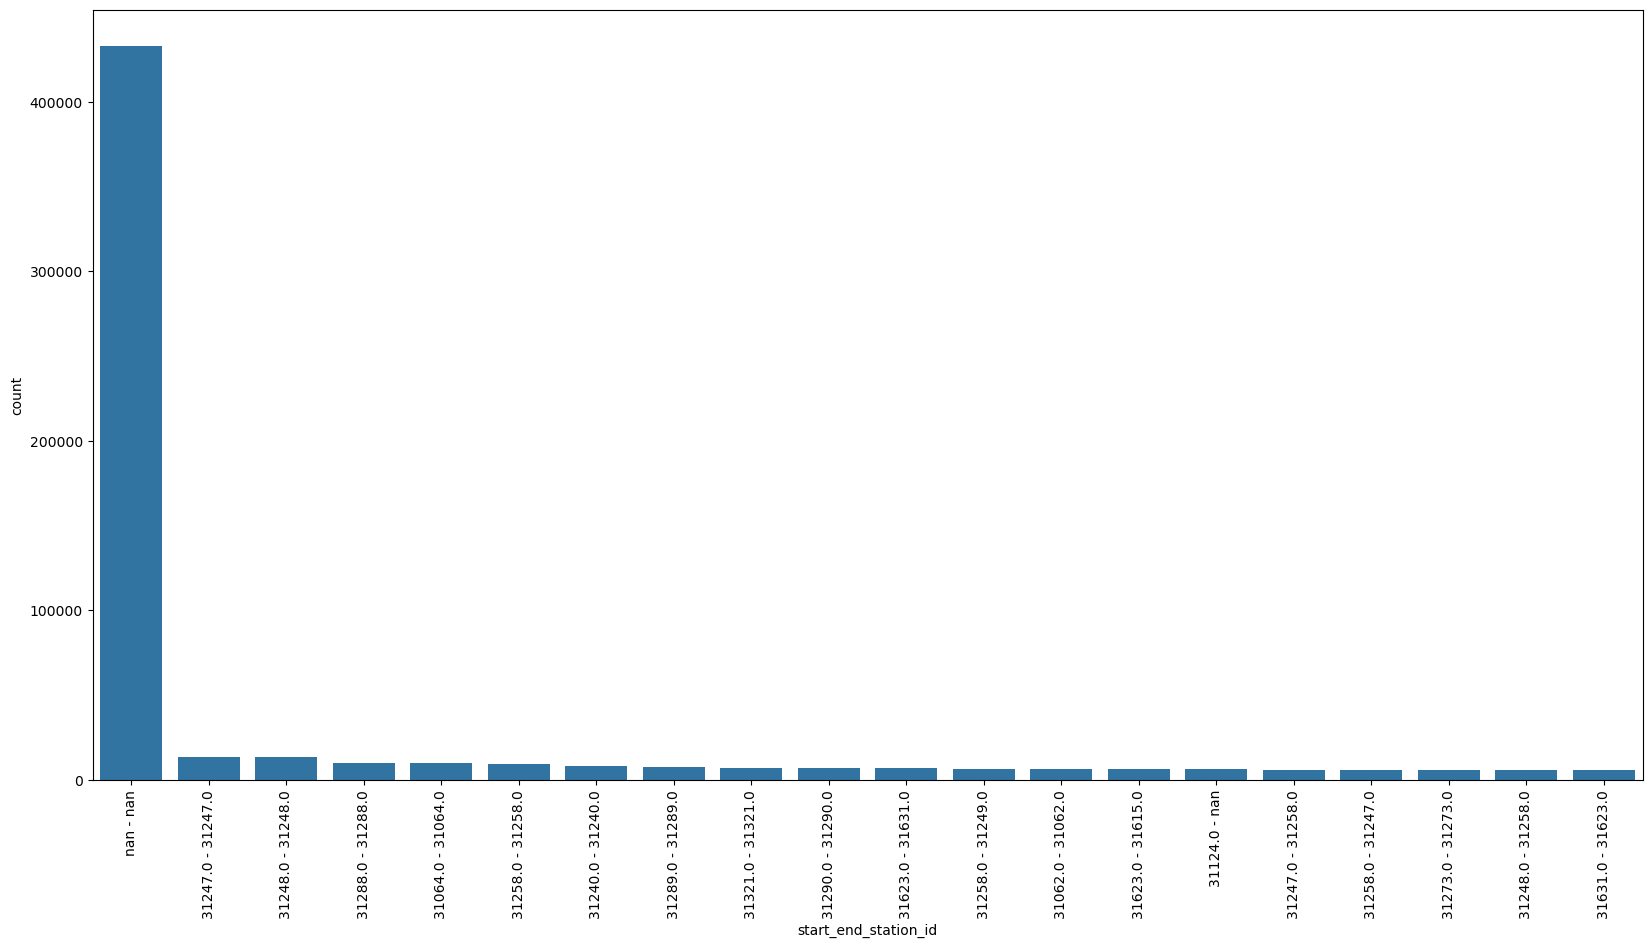

In [27]:
# Create a plot with start_end_station_id and number of rides
# limit graph to 20 stations with highest number of rides to make it more readable
plt.figure(figsize=(20, 10))
top_20_stations = df_full['start_end_station_id'].value_counts().head(20).index
sns.countplot(data=df_full[df_full['start_end_station_id'].isin(top_20_stations)], x='start_end_station_id', order=top_20_stations)
plt.xticks(rotation=90)

In [28]:
# Checking for NULLs in the data
df_full.isnull().sum()

ride_id                      0
rideable_type                0
started_at                   0
ended_at                     0
start_station_name      742776
start_station_id        742776
end_station_name        811282
end_station_id          811282
start_lat                    2
start_lng                    2
end_lat                  16765
end_lng                  16765
member_casual                0
date                         0
year                         0
season                       0
month                        0
day_of_week                  0
weekday                      0
public_holiday               0
start_end_station            0
start_end_station_id         0
duration_min                 0
trip_distance            16765
same_day_ride                0
dtype: int64

In [29]:
# Create a plot with start_end_station_id and number of rides
# limit graph to 20 stations with highest number of rides to make it more readable
# exclude NULL values
# divide each bar in the graph by member_casual
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

([0, 1], [Text(0, 0, 'casual'), Text(1, 0, 'member')])

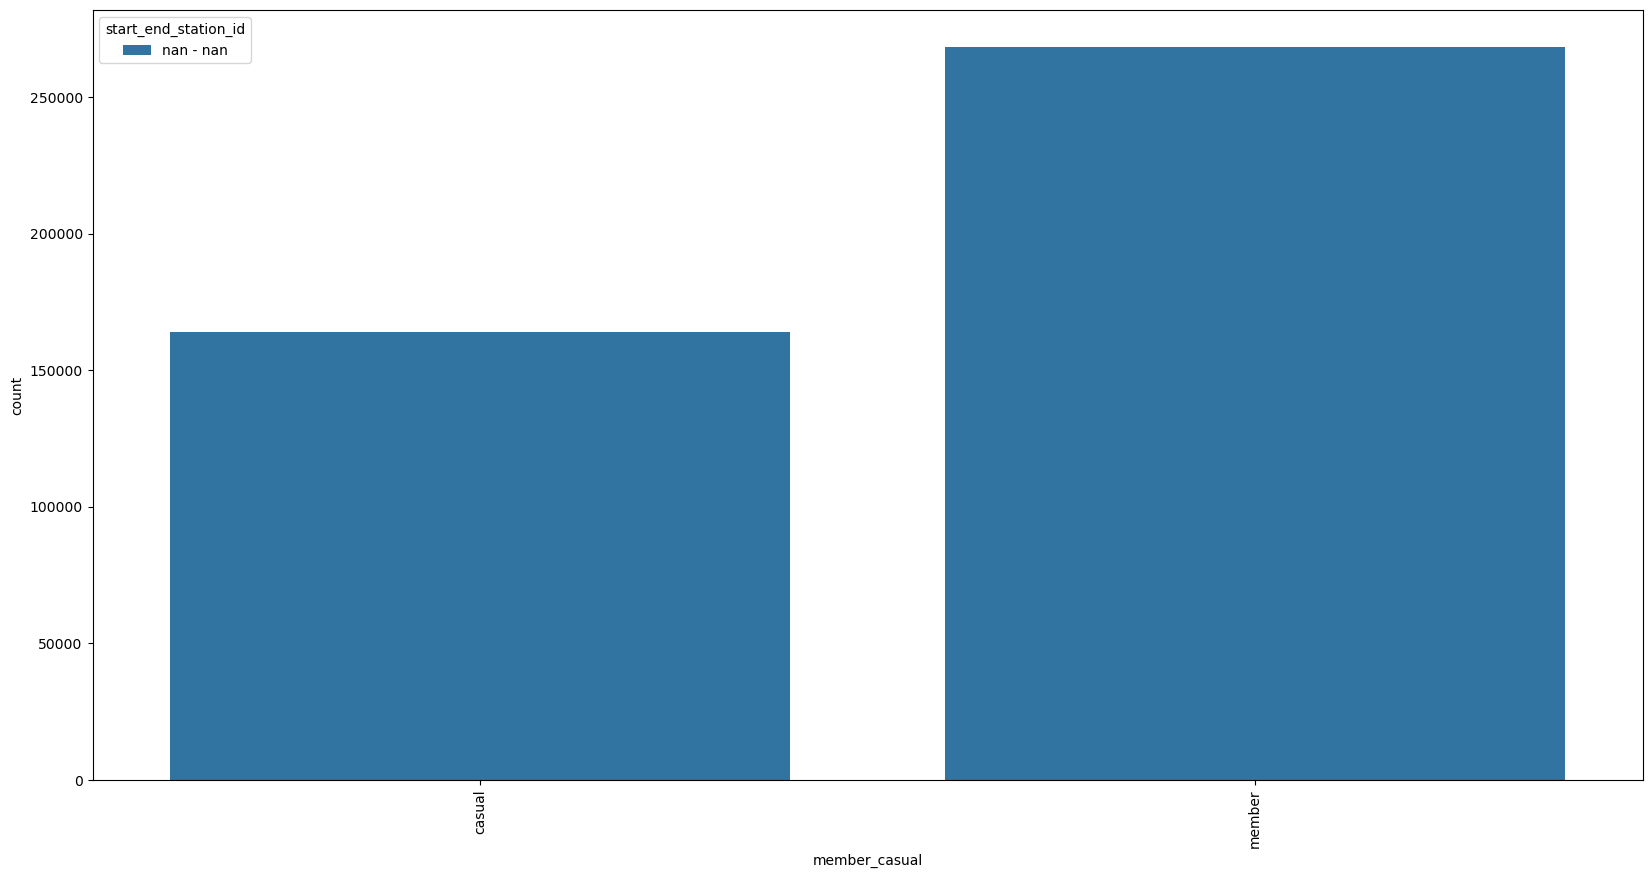

In [30]:
# Create a plot with start_end_station_id and number of rides
# limit graph to 20 stations with highest number of rides to make it more readable
# exclude NULL values
# divide each bar in the graph by member_casual

plt.figure(figsize=(20, 10))
with_null = df_full[df_full['start_end_station_id'] == 'nan - nan']
sns.countplot(data=with_null, x='member_casual', hue='start_end_station_id')
plt.xticks(rotation=90)

# Follow-up question: When do these trips w/o start / end happen?
# Is this the rebalancing of bikes?

# sum up by station the number of rides that start or end at that station per day
# then plot the number of rides per day for each station
# this will show if there are certain days where there are more rides w/o start / end station
# this could indicate that these are rebalancing trips

# sum up by station the number of rides that start or end at that station per day
# df_full['start_end_station_id'] = df_full['start_station_id'].astype(str) + ' - ' + df_full['end_station_id'].astype(str)
# df_full['start_end_station_id'] = df_full['start_end_station_id'].replace('nan - nan', np.nan)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'New Hampshire Ave & T St NW'),
  Text(1, 0, 'Columbus Circle / Union Station'),
  Text(2, 0, '15th & P St NW'),
  Text(3, 0, 'Lincoln Memorial'),
  Text(4, 0, 'Jefferson Dr & 14th St SW'),
  Text(5, 0, '1st & M St NE'),
  Text(6, 0, '4th St & Madison Dr NW'),
  Text(7, 0, '5th & K St NW'),
  Text(8, 0, '14th & V St NW'),
  Text(9, 0, 'Smithsonian-National Mall / Jefferson Dr & 12th St SW'),
  Text(10, 0, 'Eastern Market Metro / Pennsylvania Ave & 8th St SE'),
  Text(11, 0, 'Henry Bacon Dr & Lincoln Memorial Circle NW'),
  Text(12, 0, 'Massachusetts Ave & Dupont Circle NW'),
  Text(13, 0, '8th & O St NW'),
  Text(14, 0, '14th & R St NW'),
  Text(15, 0, '11th & M St NW'),
  Text(16, 0, '17th & Corcoran St NW'),
  Text(17, 0, '15th & W St NW'),
  Text(18, 0, 'Thomas Circle'),
  Text(19, 0, '6th & H St NE')])

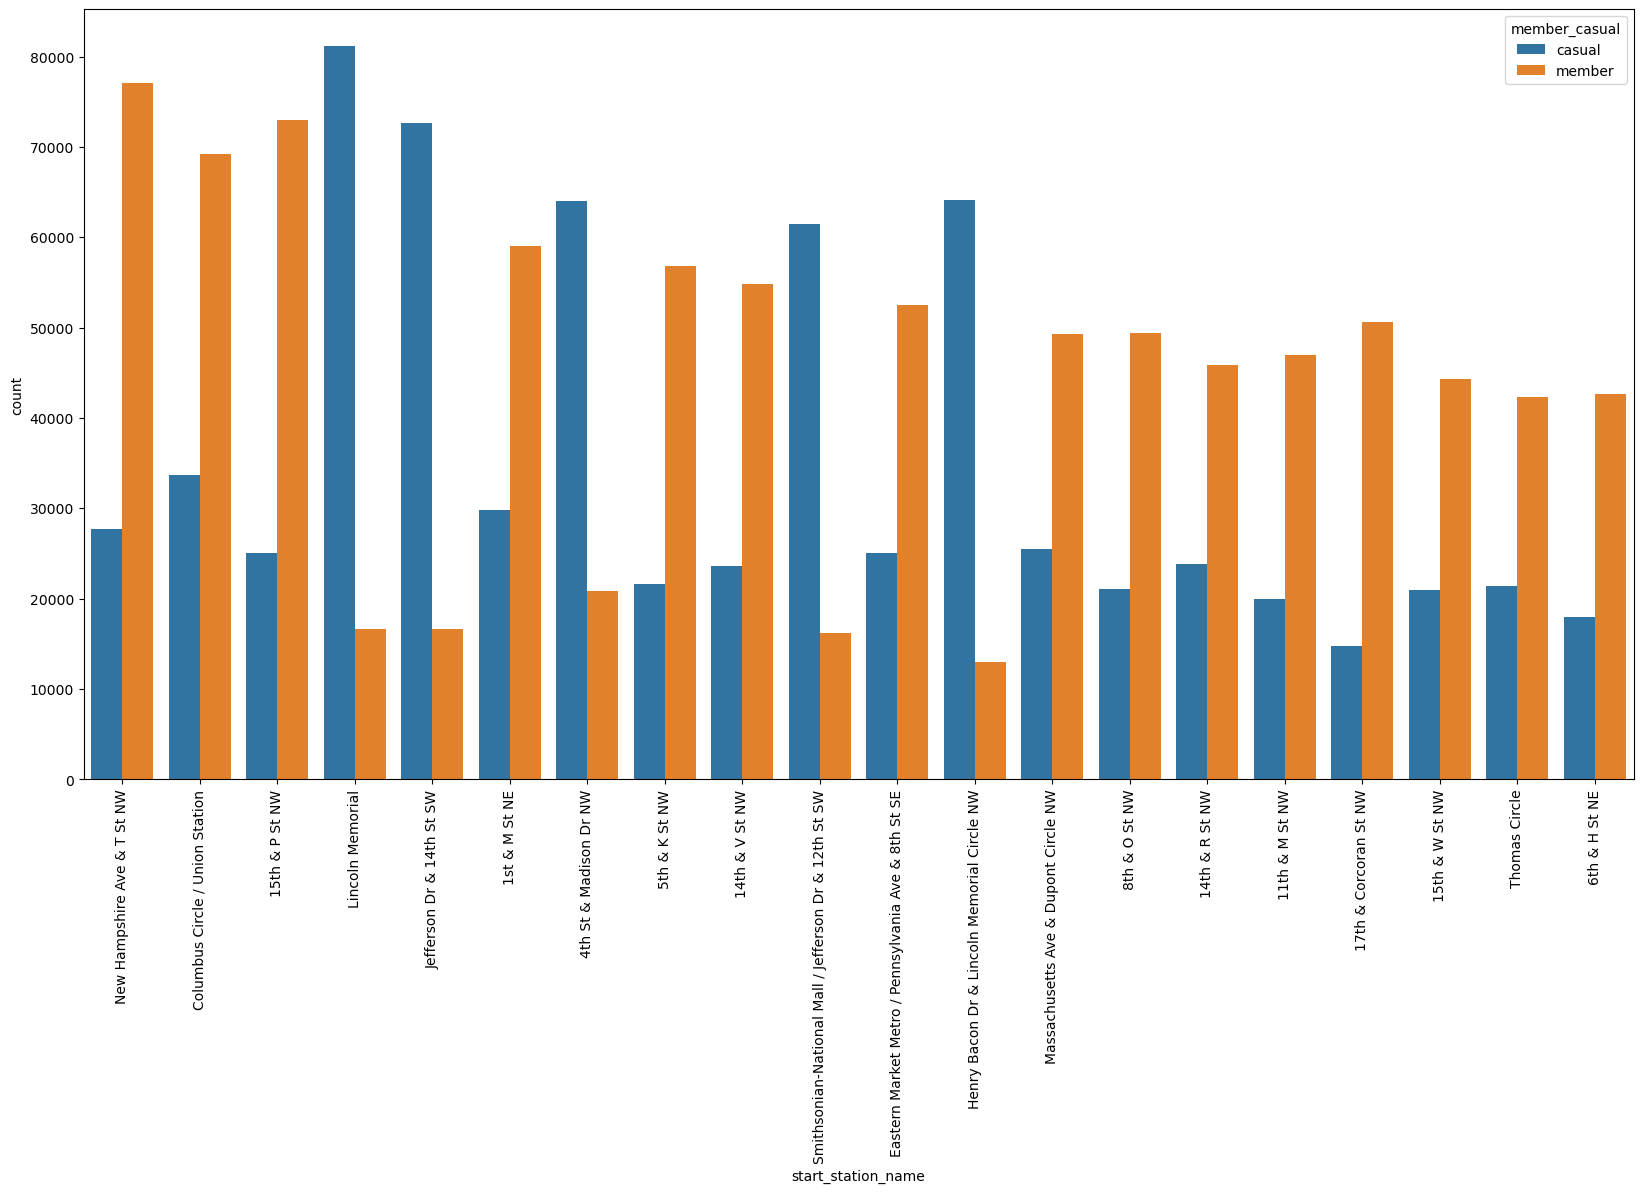

In [31]:
# create plot with top 40 start stations with empty end station
# limit graph to 20 stations with highest number of rides to make it more readable
# exclude NULL values
# divide each bar in the graph by member_casual

plt.figure(figsize=(20, 10))
without_null_end = df_full[df_full['end_station_name'] != 'nan']
top_20_stations_end = without_null_end['start_station_name'].value_counts().head(20).index
sns.countplot(data=without_null_end[without_null_end['start_station_name'].isin(top_20_stations_end)], x='start_station_name', order=top_20_stations_end, hue='member_casual')
plt.xticks(rotation=90)

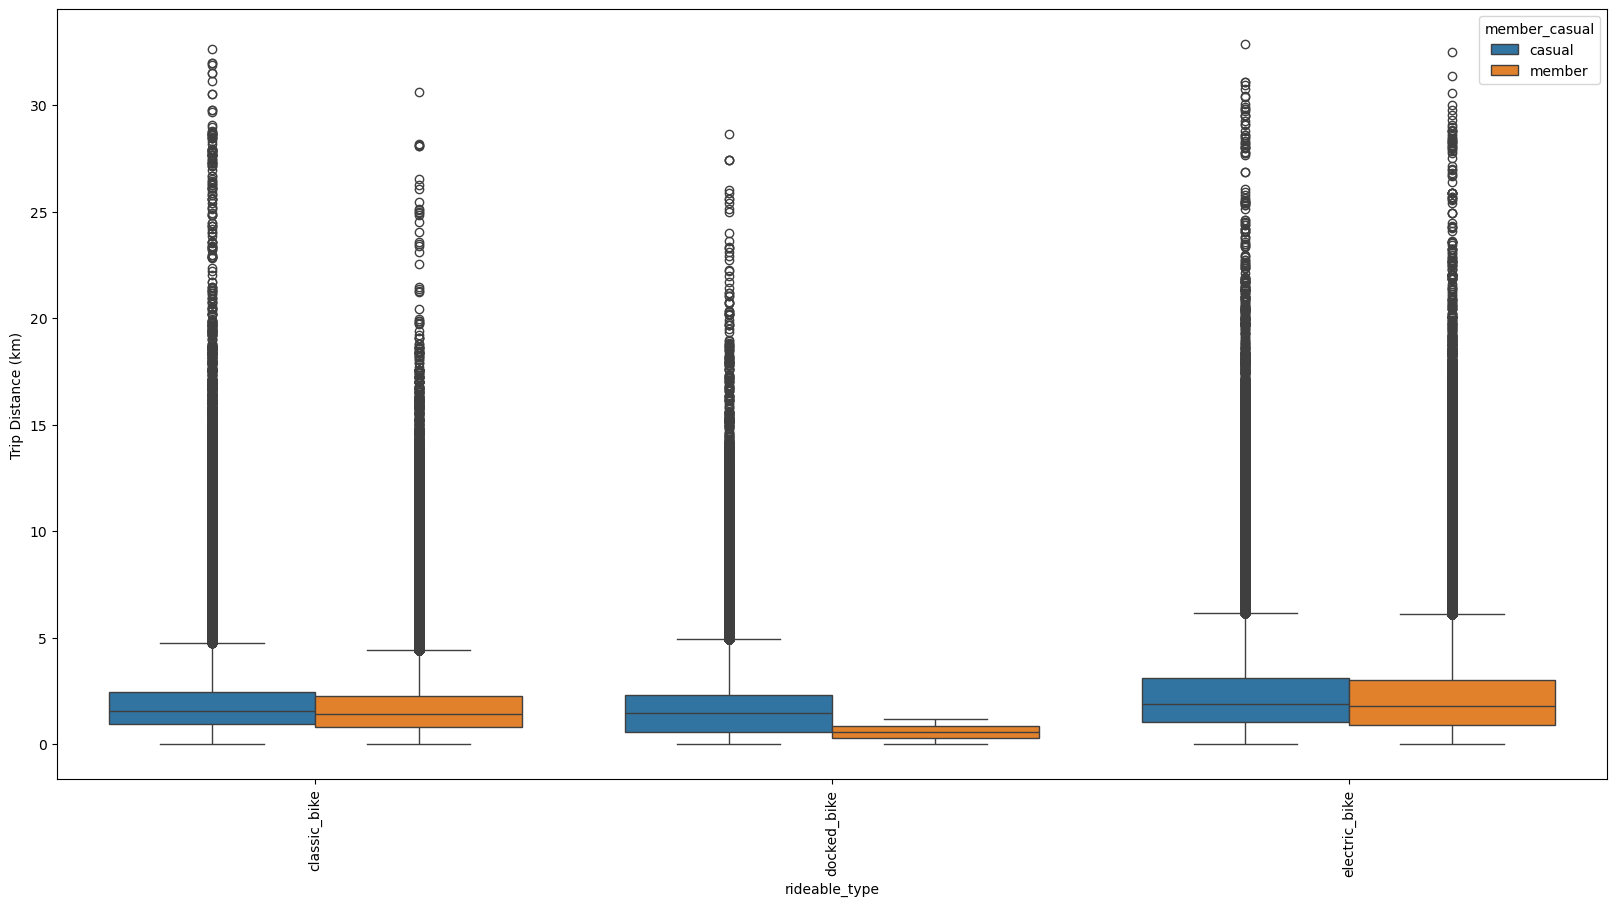

In [32]:
# Generate Box Plot for trip_distance in km and ride_type
# there are some outliers in the data, so we limit the trip_distance to 60km

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_full[df_full['trip_distance'] < 40], x='rideable_type', y='trip_distance', hue='member_casual')
plt.xticks(rotation=90)
plt.ylabel('Trip Distance (km)')
plt.show()


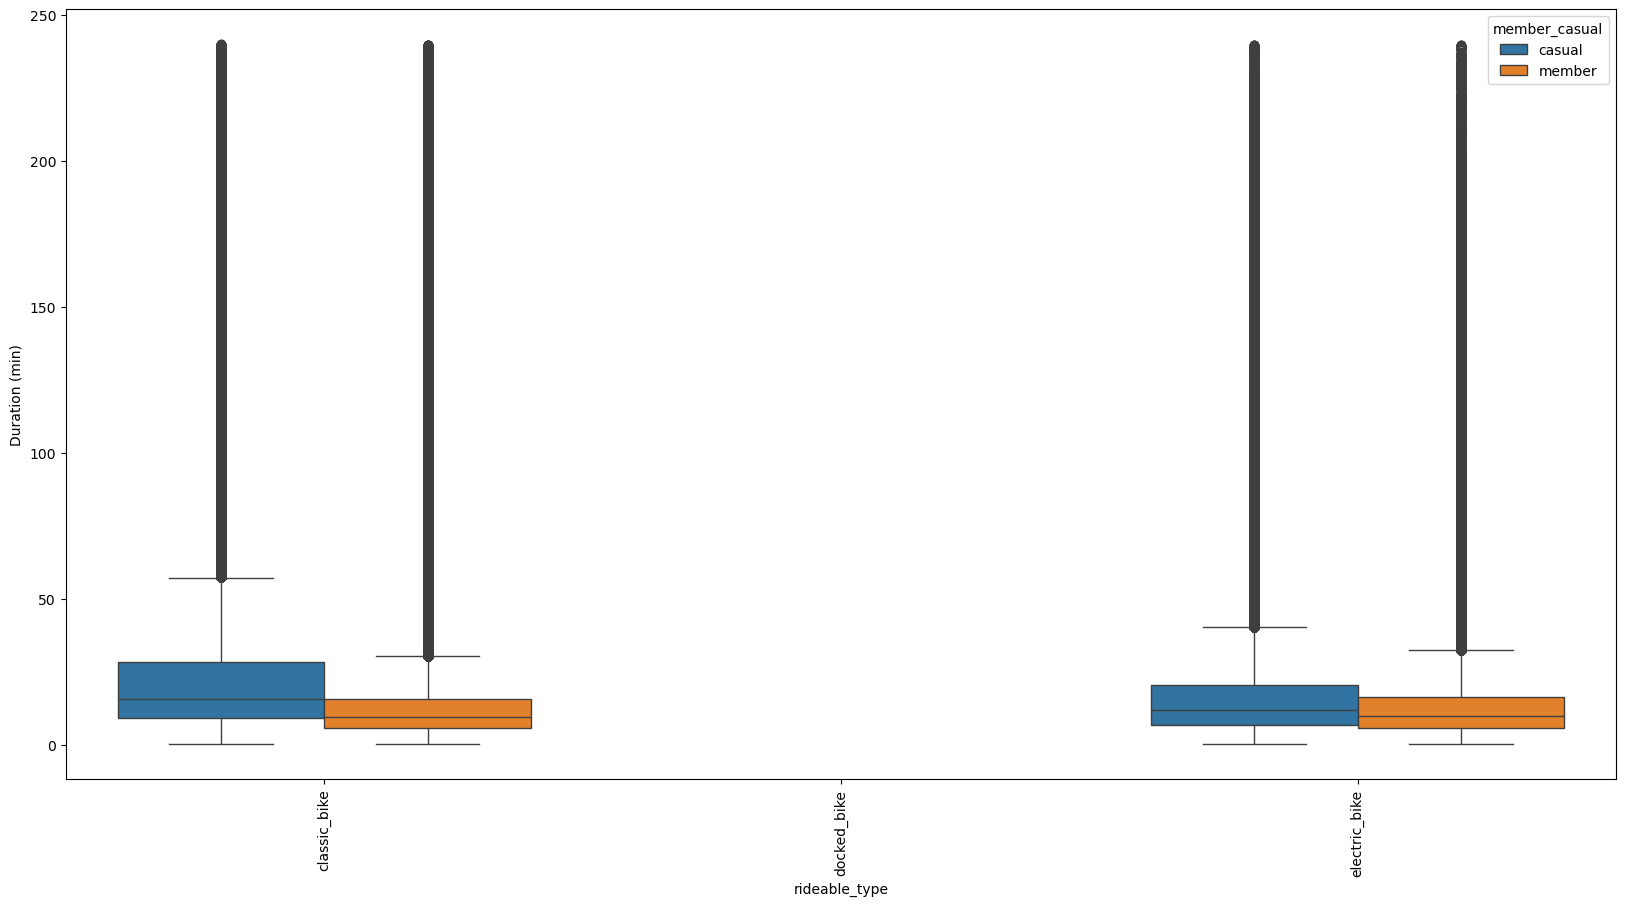

In [33]:
# Generate Box Plot for duration in minutes and ride_type
# there are some outliers in the data, so we limit the trip_distance to 60km

plt.figure(figsize=(20, 10))
# include code here to exclude rows with neative duration
df_full = df_full[(df_full['duration_min'] > 0) & (df_full['duration_min'] < 240)]
sns.boxplot(data=df_full[df_full['rideable_type'] != 'docked_bike'], x='rideable_type', y='duration_min', hue='member_casual')
plt.ylabel('Duration (min)')
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001C98CEAF940> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

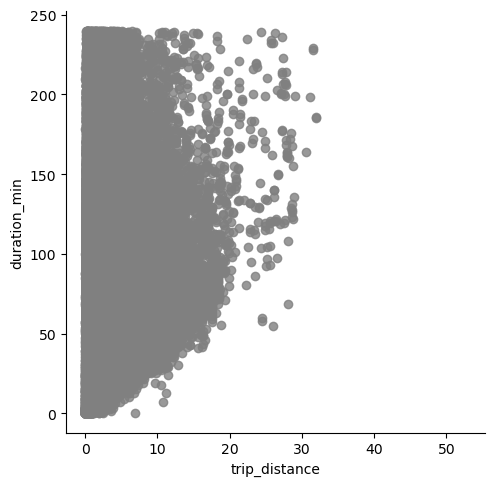

In [34]:
# Compare trip_distance & duration_min & rideable_type

df_full = df_full[(df_full['duration_min'] > 0) & (df_full['duration_min'] < 240) & 
(df_full['trip_distance'] > 0) & (df_full['trip_distance'] < 60)]
sns.lmplot(x='trip_distance', y='duration_min', data=df_full, hue='rideable_type', 
            palette={"classic_bike": "grey", "electric_bike": "green", "docked_bike": "yellow"})

In [ ]:
df_full["same_day_ride"].value_counts()

same_day_ride
No    10011066
Name: count, dtype: int64

ATTENTION: MOVE code to generate same_day_ride to top

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# upload capacity data
df_capacity = pd.read_csv('capacity_data.csv', sep=";")

In [ ]:
df_capacity.head()

,start_station_name,capacity
0,10th & K St NW,23
1,4th & D St NW / Judiciary Square,15
2,Eastern Market Metro,32
3,14th & Irving St NW,15
4,18th & Monroe St NE,19


In [ ]:
df_full_2['station'].map(capacity['capacity'])

KeyError: 'capacity'

In [ ]:
# [2] Check imbalance between stations 
# Start stations with highest count per day (which time dimension: month, year)
# End stations with highest count per day (which time dimension: month, year) 
# show imbalance, compute daily balance by station (limit to one peak month in summer, and off-peak month in autumn) 
# I have capacity data per station in external file
# Method:
# pre-work: Upload capacity by station, exclude: docked bike, include only: same_day_ride (new) = Yes (i.e. Start and end day = same day), check count of UNIQUE start_station and UNIQUE end_station 
# use for loop which takes for pre-defined time period by day (date + weekday) [1]count of start stations occurance (value_counts) and save (append) to new column (count_pickup) and [2] count of end stations_occurance and save (append) to new column (count_collect) 
# use neutral, new column “station”
# this information ('date', 'weekday', 'capacity', 'station', 'count_pickup', 'count_return' goes into a function
# once i have collected above data: (groupby) [1] calculate by station AND day, 'count_pickup' – 'count_return' and create line chart with all stations --> identify stations where always positive / always negative --> balancing effort needed [2] count_pickups / divided by capacity ---> high / low turnover stations 
# exceptions zero count for start station but count for end station 



# exclude docked bikes if the column exists
if 'rideable_type' in df_full.columns:
    df_full = df_full[df_full['rideable_type'] != 'docked_bike']

# # create a new column in dataset same_day_ride which cheks if start and end day are the same and returns boolean
# df_full['same_day_ride'] = np.where(df_full['started_at'] == df_full['ended_at'], 'Yes', 'No')

# include only same_day_ride = Yes
# df_full = df_full[df_full['same_day_ride'] == 'Yes']

# check count of unique start and end stations
unique_start = df_full['start_station_id'].unique()
unique_end = df_full['end_station_id'].unique()

# check count of start stations per day
df_full_2 = df_full.copy() # to make sure any changes in df_full will not automatically affect df_full_2
df_full_2['started_at'] = pd.to_datetime(df_full['started_at'])
df_full_2['ended_at'] = pd.to_datetime(df_full['ended_at'])
df_full_2['weekday'] = df_full['started_at'].dt.day_name()
df_full_2['date'] = df_full['started_at'].dt.date
df_full_2['date'] = pd.to_datetime(df_full['date'])
df_full_2 = df_full_2[['start_station_id', 'end_station_id', 'date', 'weekday']]
df_full_2['count_pickup'] = df_full['start_station_id'].map(df_full_2['start_station_id'].value_counts())
df_full_2['count_return'] = df_full['end_station_id'].map(df_full['end_station_id'].value_counts())
df_full_2 = df_full_2.drop_duplicates(subset=['start_station_id', 'end_station_id', 'date'])

# import csv capacity_data.csv
df_capacity = pd.read_csv('capacity_data.csv', engine='python')

# append column capacity from dataframe df_capacity to df_full and use start_station_name as identifier


# create function to calculate daily balance by station
def daily_balance(df, capacity):
    df['balance'] = df['count_pickup'] - df['count_return']
    df['station'] = df['start_station_id']
    df['capacity'] = df['station'].map(capacity['capacity'])
    df['turnover'] = df['count_pickup'] / df['capacity']
    return df

# create line chart with all stations
df_full_station_load = daily_balance(df_full_2, df_capacity)
print(df_full_station_load)

# df_full_station_load.groupby(['date', 'station'])['balance'].sum().unstack().plot(figsize=(20, 10))

# count pickups divided by capacity
# df_full_station_load.groupby(['date', 'station'])['turnover'].mean().unstack().plot(figsize=(20, 10))

# # exceptions zero count for start station but count for end station
# zero_count = df_full[(df_full['count_pickup'] == 0) & (df_full['count_return'] > 0)]

# # limit to one peak month in summer and
# test_month = df_full[(df_full['year'] == 2023) & (df_full['month'] == 'August')]
# test_month = test_month[test_month['same_day_ride'] == 'Yes']
# test_month['start_day'] = pd.to_datetime(test_month['start_day'])
# test_month['end_day'] = pd.to_datetime(test_month['end_day'])
# test_month['weekday'] = test_month['start_day'].dt.day_name()
# test_month['date'] = test_month['start_day'].dt.date
# test_month['date'] = pd.to_datetime(test_month['date'])
# test_month = test_month[['start_station_id', 'end_station_id', 'date', 'weekday']]
# test_month['count_pickup'] = test_month['start_station_id'].map(test_month['start_station_id'].value_counts())
# test_month['count_return'] = test_month['end_station_id'].map(test_month['end_station_id'].value_counts())
# test_month = test_month.drop_duplicates(subset=['start_station_id', 'end_station_id', 'date'])






KeyError: 'capacity'

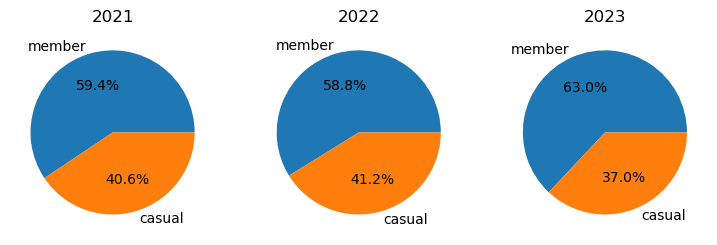

In [ ]:
# create three pie charts next to each other (year 2021, 2022, 2023) with the number of rides by member_casual
# Number of rides by member type

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
df_full[df_full['year'] == 2021]['member_casual'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('2021')

plt.subplot(1, 3, 2)
df_full[df_full['year'] == 2022]['member_casual'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('2022')

plt.subplot(1, 3, 3)
df_full[df_full['year'] == 2023]['member_casual'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('2023')
plt.show()

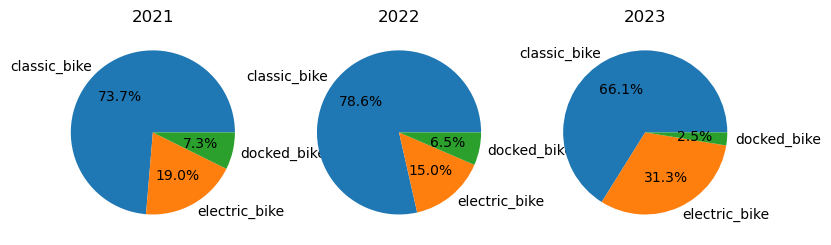

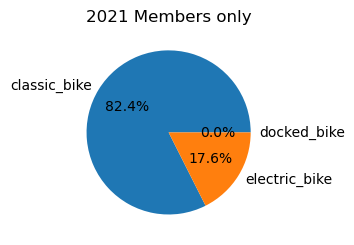

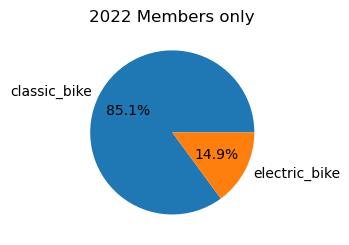

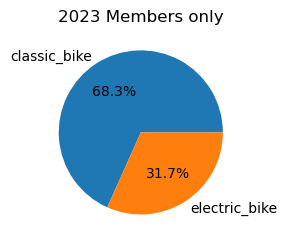

In [ ]:
# create three pie charts next to each other (year 2021, 2022, 2023) with the number of rides by rideable_type

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
df_full[df_full['year'] == 2021]['rideable_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('2021')

plt.subplot(1, 3, 2)
df_full[df_full['year'] == 2022]['rideable_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('2022')

plt.subplot(1, 3, 3)
df_full[df_full['year'] == 2023]['rideable_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('2023')
plt.show()

# analyze same only for member_casual with focus on member
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
df_full[(df_full['year'] == 2021) & (df_full['member_casual'] == 'member')]['rideable_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('2021 Members only')

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 2)
df_full[(df_full['year'] == 2022) & (df_full['member_casual'] == 'member')]['rideable_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('2022 Members only')

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 3)
df_full[(df_full['year'] == 2023) & (df_full['member_casual'] == 'member')]['rideable_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('2023 Members only')
plt.show()


In [ ]:
string_col = df.select_dtypes(include="object").columns

NameError: name 'df' is not defined

In [ ]:
df[string_col].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical values in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: int64
The distribution of categorical values in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
The distribution of categorical values in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
The distribution of categorical values in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
The distribution of categorical values in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


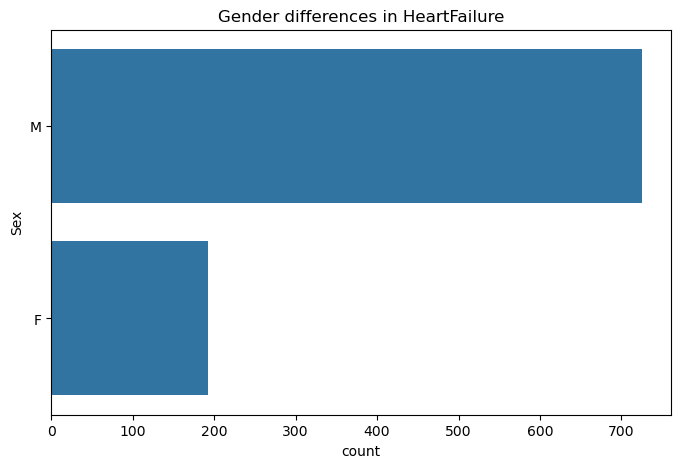

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['Sex'])
plt.title('Gender differences in HeartFailure')
plt.show()

Text(0.5, 1.0, 'The number of heart patients to healthy people')

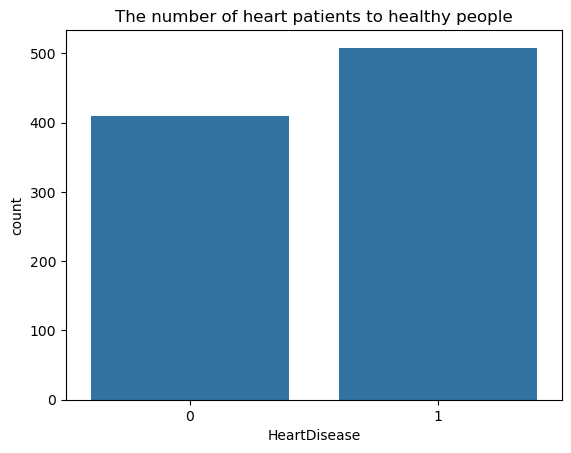

In [ ]:
sns.countplot(data=df,x='HeartDisease')
plt.title('The number of heart patients to healthy people')

In [ ]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()


Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64

In [ ]:
grouped_df = df.groupby(['Sex', 'HeartDisease'])['HeartDisease'].count().unstack()
grouped_df

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


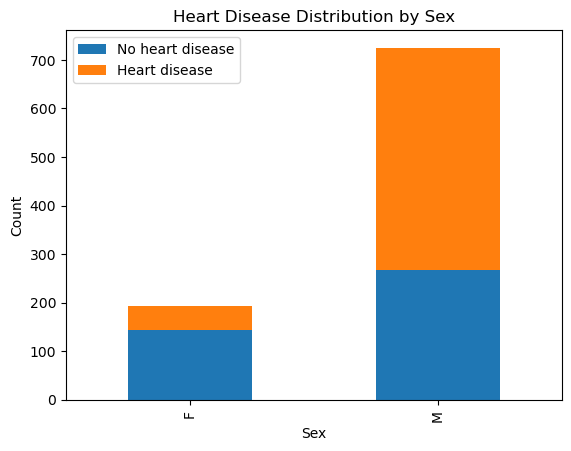

In [ ]:
grouped_df = df.groupby(['Sex', 'HeartDisease'])['HeartDisease'].count().unstack()

# Rename the columns (0 becomes "No heart disease" and 1 becomes "Heart disease")
grouped_df.columns = ['No heart disease', 'Heart disease']

# If you want to transpose the dataframe so that 'Heart disease' and 'No heart disease' are on the x-axis (fix labels then too!)
#grouped_df = grouped_df.T

# Plot a stacked bar chart
grouped_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Heart Disease Distribution by Sex')

# Show the plot
plt.show()

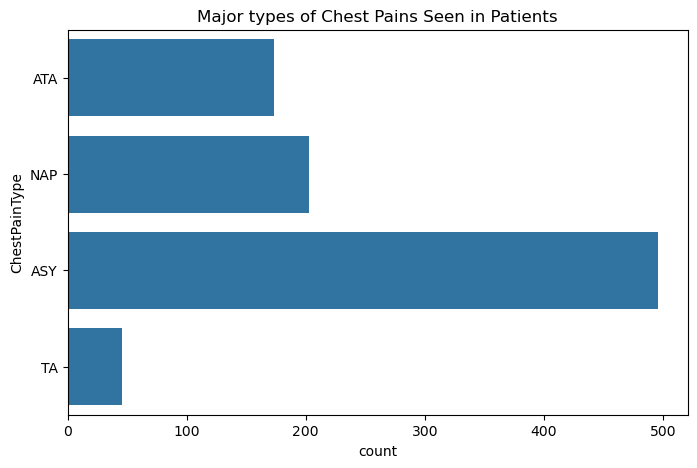

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['ChestPainType'])
plt.title('Major types of Chest Pains Seen in Patients')
plt.show()

In [ ]:
df.pivot_table(index='Sex',columns='RestingECG', values='HeartDisease', aggfunc='mean')

RestingECG,LVH,Normal,ST
Sex,,,
F,0.297872,0.245763,0.250000
M,0.652482,0.589862,0.733333


array([<Axes: ylabel='LVH'>, <Axes: ylabel='Normal'>, <Axes: ylabel='ST'>],
      dtype=object)

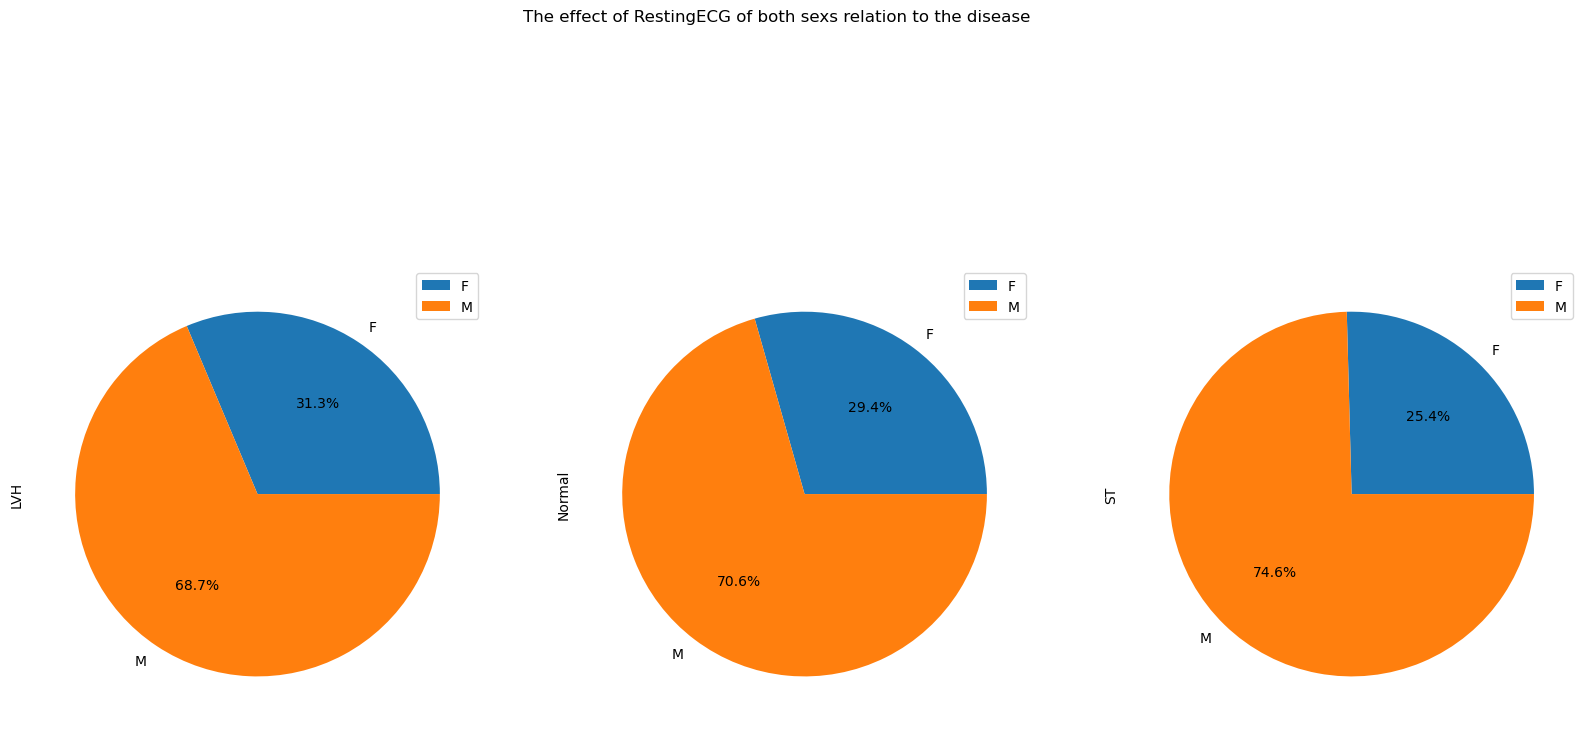

In [ ]:
df.pivot_table(
    index='Sex',
    columns='RestingECG', 
    values='HeartDisease',
    aggfunc='mean'
).plot.pie(
    subplots=True,
    figsize=(20,10),
    title='The effect of RestingECG of both sexs relation to the disease ',
    autopct ='%1.1f%%'
)

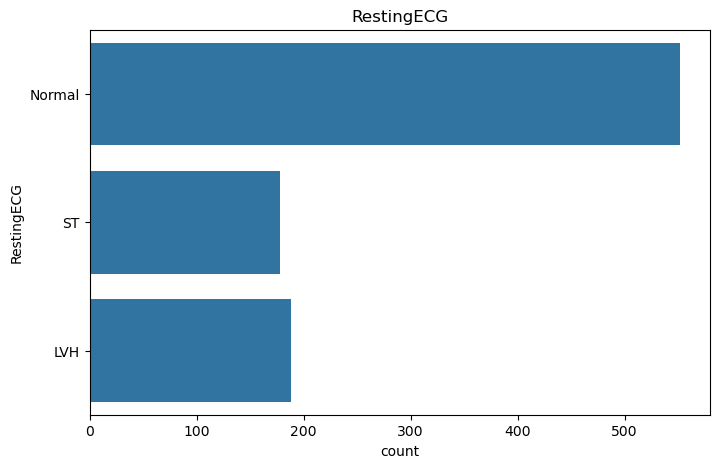

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['RestingECG'])
plt.title('RestingECG')
plt.show()

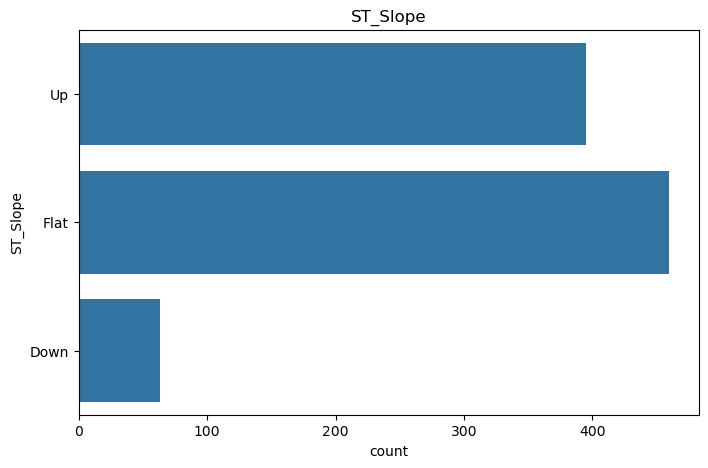

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['ST_Slope'])
plt.title('ST_Slope')
plt.show()

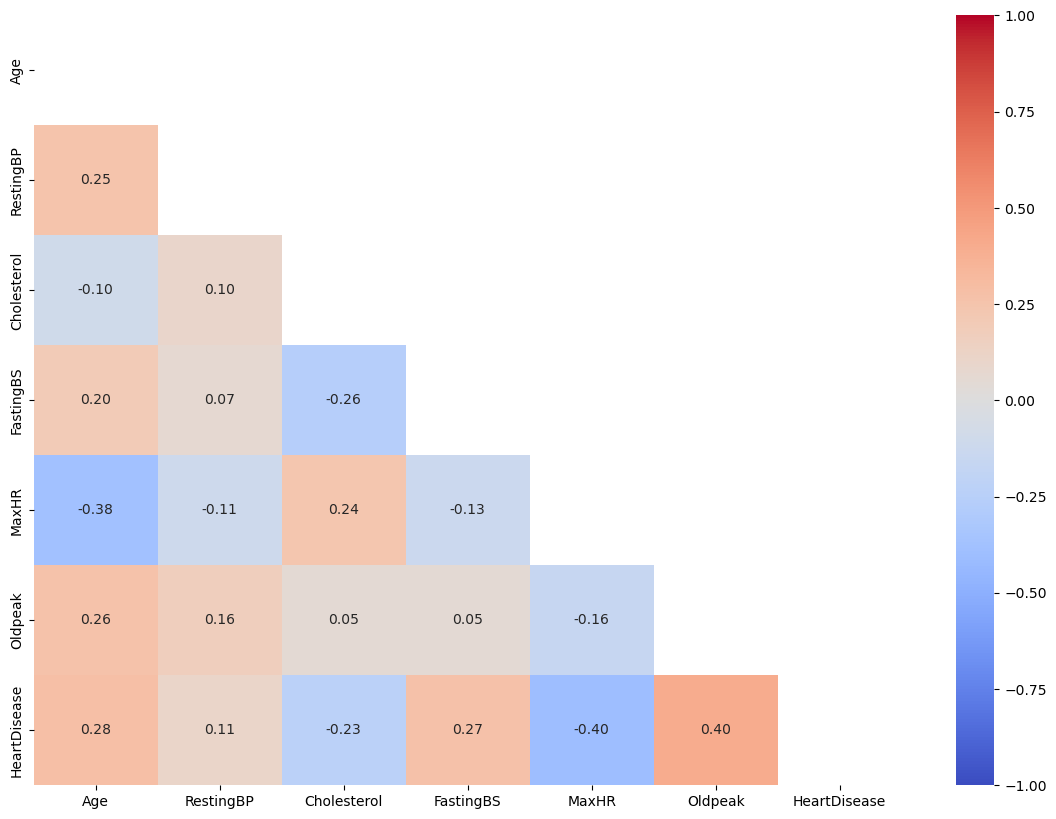

In [ ]:
numf= df.select_dtypes('number').columns


matrix = np.triu(df[numf].corr())
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap (df[numf].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

In [ ]:
df.describe(include='O')


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


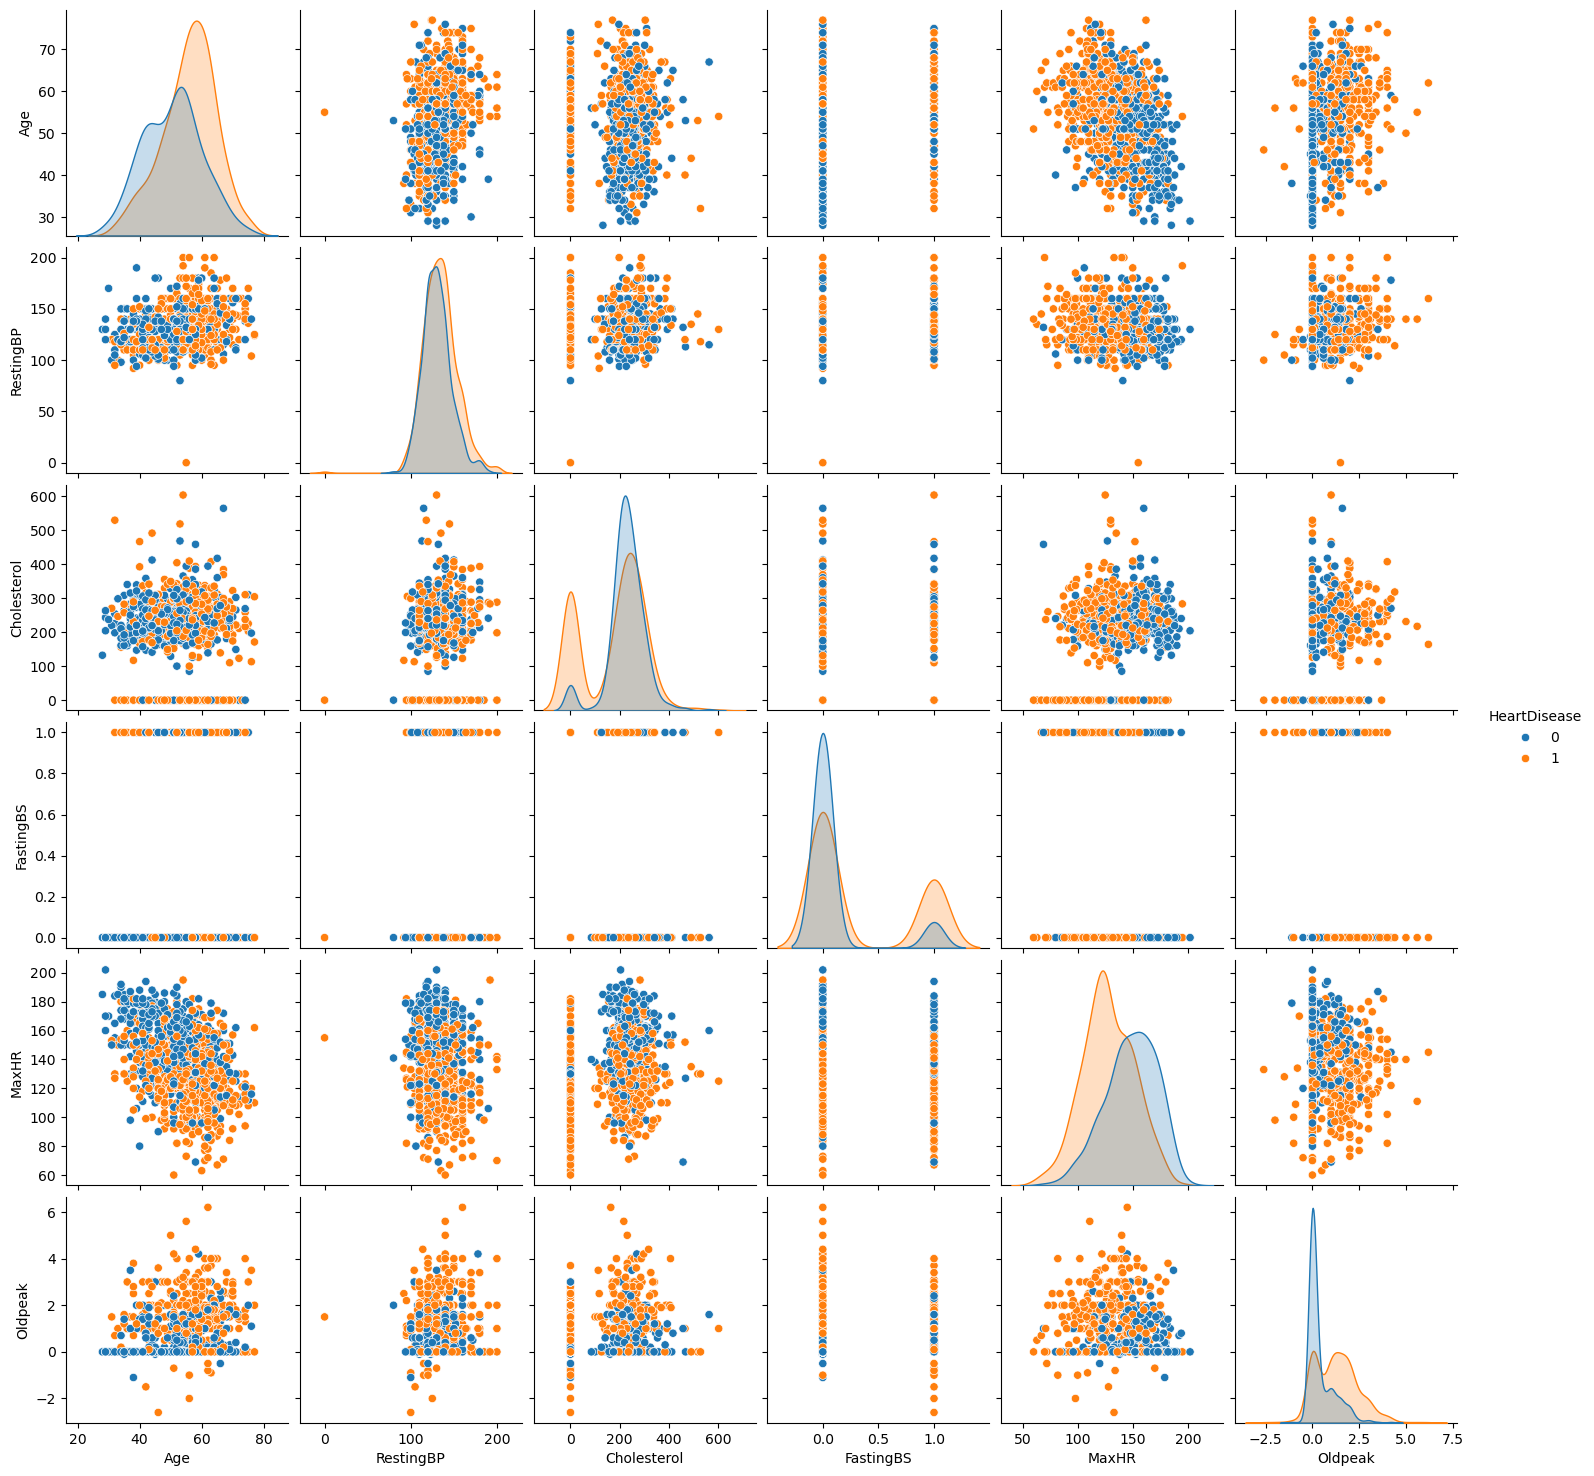

In [ ]:
sns.pairplot(data=df,hue='HeartDisease')


Text(0.5, 1.0, 'Distribution of maximum heart rate achieved by HeartDisease')

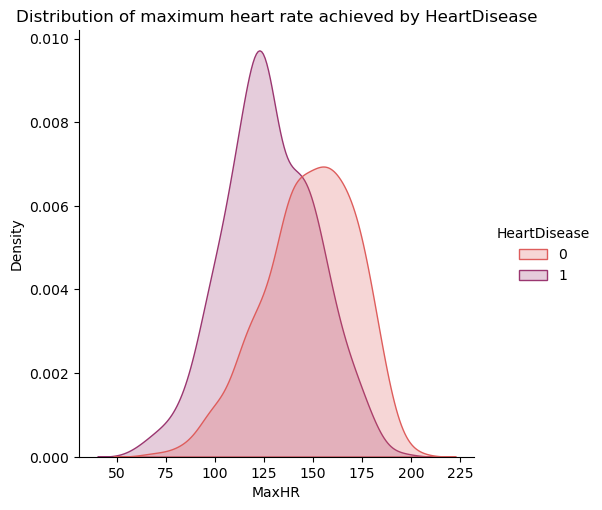

In [ ]:
sns.displot(data=df,x='MaxHR',hue='HeartDisease',palette='flare',kind='kde',fill=True)
plt.title('Distribution of maximum heart rate achieved by HeartDisease')

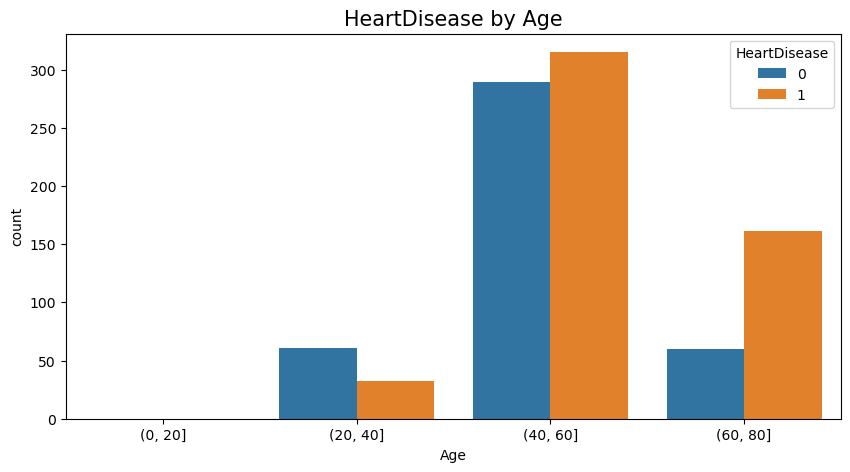

In [ ]:
plt.figure(figsize=(10,5))
bins=[0, 20, 40, 60, 80]
sns.countplot(x=pd.cut(df.Age,bins=bins),hue=df.HeartDisease)
plt.title("HeartDisease by Age", fontsize=15)
plt.show()

In [ ]:
colors = ['#9A9483', '#99A799', '#D3E4CD', '#26191B']


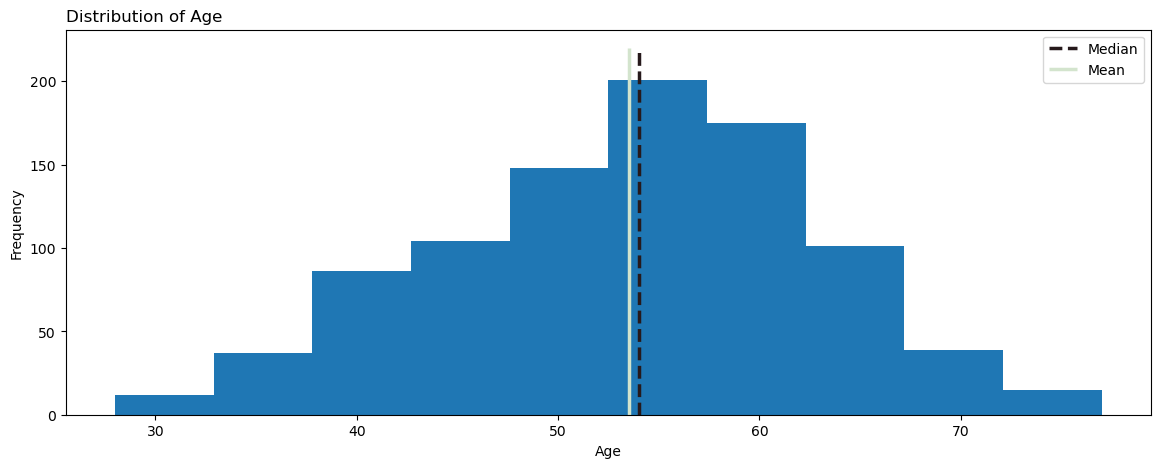

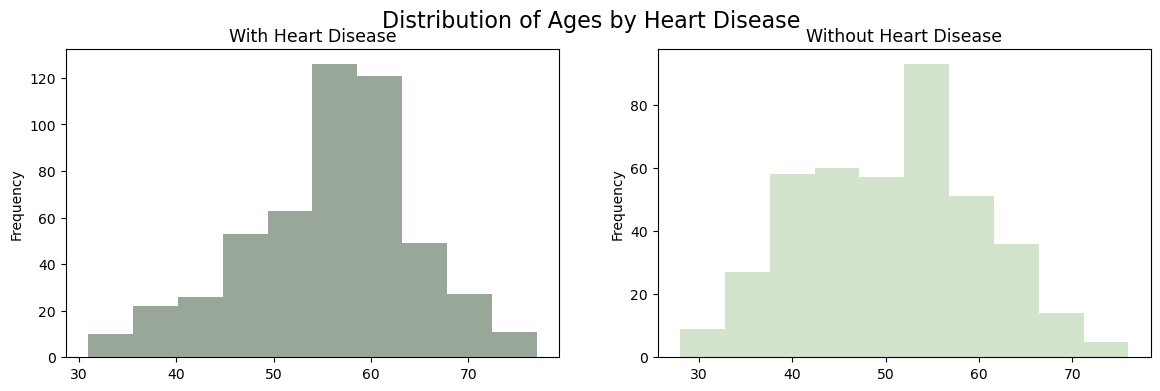

In [ ]:
# df preparation for distribution of ages.
ageMed=df.Age.median()
ageMean = df.Age.mean()

# grouped df by target feature 'HeartDisease'
group = df.groupby(by='HeartDisease')
hd_df = group.get_group(1)
nhd_df = group.get_group(0)

# selecting age by heart disease
a = hd_df['Age']
b = nhd_df['Age']

# plot
plt.figure(figsize=(14, 5))
plt.hist(df.Age,  ec=colors[-1])
plt.vlines(ageMed, ymin=0, ymax=220, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(ageMean, ymin=0, ymax=220, color=colors[-2], lw=2.5, label='Mean')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age", loc='left')
plt.legend()

# subplots
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax1 = a.plot(kind='hist', ax=axs[0], ec=colors[-1], color=colors[1])
ax1.set_title('With Heart Disease', size=12.5)
ax2 = b.plot(kind='hist', ax=axs[1], ec=colors[-1], color=colors[2])
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('Distribution of Ages by Heart Disease', size=16, c='#000')
plt.show()

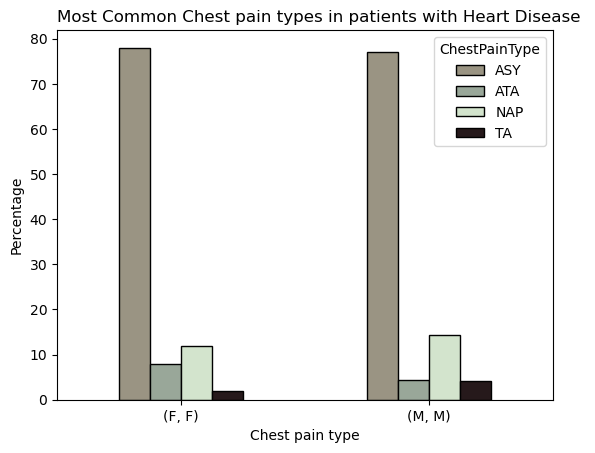

In [ ]:
# Most common chest pain in patients with heart disease.
a = hd_df.groupby(['Sex', 'ChestPainType'])['HeartDisease'].count()

# Calculate percentage distribution within each sex group.
a = a.groupby(level=0).apply(lambda x: 100 * x / x.sum())

# Unstack and plot
a.unstack().plot(kind='bar', ec='#000', color=colors)

plt.xlabel('Chest pain type')
plt.ylabel('Percentage')
plt.title("Most Common Chest pain types in patients with Heart Disease ", loc='left')

plt.xticks(rotation=0)
plt.show()
